In [1]:
import cv2
import numpy as np

BLUE = (0, 0, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)

def showImage(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.show()

In [2]:
def drawLine(image, startPoint, endPoint, color):
  cv2.line(image,
        startPoint,
        endPoint,
        color,
        5)

In [3]:
def drawRectangleInBoard(image, positionBoardX, positionBoardY, color):
    offsetX, offsetY = 55 + positionBoardX * 80, 100 + positionBoardY * 80
    cv2.rectangle(image, 
                  (0 + offsetX, 0 + offsetY), 
                  (30 + offsetX, 30 + offsetY), 
                  color,
                 -1)

In [4]:
def drawTriangleInBoard(image, positionBoardX, positionBoardY, _color):
    offsetX, offsetY = 50 + positionBoardX * 80, 90 + positionBoardY * 80
    vertices = np.array([(0 + offsetX, 0 + offsetY), (0 + offsetX, 50 + offsetY), (50 + offsetX, 50 + offsetY)], np.int32)
    pts = vertices.reshape((-1, 1, 2))

    cv2.fillPoly(image,
                [pts], 
                color = _color)

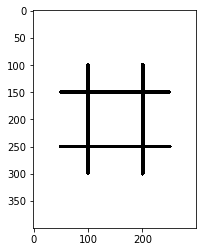

In [5]:
ticTacToeBoard = np.empty([400, 300, 3], dtype = np.uint8)
ticTacToeBoard.fill(255)

drawLine(ticTacToeBoard, (100, 100), (100, 300), BLACK)
drawLine(ticTacToeBoard, (50, 150), (250, 150), BLACK)
drawLine(ticTacToeBoard, (200, 100), (200, 300), BLACK)
drawLine(ticTacToeBoard, (50, 250), (250, 250), BLACK)

showImage(ticTacToeBoard)

In [8]:
def getGameOver(gameBoardPositions):
    
    #print(gameBoardPositions)
    
    #linha
    if gameBoardPositions[0][0] == gameBoardPositions[1][0] == gameBoardPositions[2][0] and gameBoardPositions[0][0] != 0:
        return gameBoardPositions[0][0]
    elif gameBoardPositions[0][1] == gameBoardPositions[1][1] == gameBoardPositions[2][1] and gameBoardPositions[0][1] != 0:
        return gameBoardPositions[0][1]
    elif gameBoardPositions[0][2] == gameBoardPositions[1][2] == gameBoardPositions[2][2] and gameBoardPositions[0][2] != 0:
        return gameBoardPositions[0][2]
        
    #coluna
    if gameBoardPositions[0][0] == gameBoardPositions[0][1] == gameBoardPositions[0][2] and gameBoardPositions[0][0] != 0:
         return gameBoardPositions[0][0]
    elif gameBoardPositions[1][0] == gameBoardPositions[1][1] == gameBoardPositions[1][2] and gameBoardPositions[1][0] != 0:
        return gameBoardPositions[1][0]
    elif gameBoardPositions[2][0] == gameBoardPositions[2][1] == gameBoardPositions[2][2] and gameBoardPositions[2][0] != 0:
        return gameBoardPositions[2][0]
        
    #diagonal
    if gameBoardPositions[0][0] == gameBoardPositions[1][1] == gameBoardPositions[2][2] and gameBoardPositions[0][0] != 0:
        return gameBoardPositions[0][0]
    elif gameBoardPositions[2][0] == gameBoardPositions[1][1] == gameBoardPositions[0][2] and gameBoardPositions[2][0] != 0:
        return gameBoardPositions[2][0]
        
    #empate
    if 0 not in gameBoardPositions[0] and 0 not in gameBoardPositions[1] and 0 not in gameBoardPositions[2]:
        return -1
        
    return 0

In [9]:
import random

def play():
    EMPATE = -1
    VITORIA_CPU = 1
    VITORIA_JOGADOR = 2

    occupiedPositions = [[0, 0, 0],
                         [0, 0, 0],
                         [0, 0, 0]]
    notFinished = True
    cpuTurn = True

    currentMatch = ticTacToeBoard.copy()
    while 1:
        #cpu turn
        if cpuTurn == True:
            randomPosX, randomPosY = random.randint(0, 2), random.randint(0, 2)
            while occupiedPositions[randomPosX][randomPosY] != 0:
                randomPosX, randomPosY = random.randint(0, 2), random.randint(0, 2)

            drawTriangleInBoard(currentMatch, randomPosX, randomPosY, BLUE)
            occupiedPositions[randomPosX][randomPosY] = 1

            cpuTurn = False
        else:
            posX = int(input("Escolha a posição desejada para x:"))
            posY = int(input("Escolha a posição desejada para y:"))

            while occupiedPositions[posX][posY] != 0:
                print("Esse lugar está ocupado!")
                posX = int(input("Escolha a posição desejada para x:"))
                posY = int(input("Escolha a posição desejada para y:"))

            drawRectangleInBoard(currentMatch, posX, posY, RED)
            occupiedPositions[posX][posY] = 2

            cpuTurn = True

        showImage(currentMatch)
        if getGameOver(occupiedPositions) != 0:
            if getGameOver(occupiedPositions) == EMPATE:
                print("EMPATE!")
            elif getGameOver(occupiedPositions) == VITORIA_CPU:
                print("VOCÊ PERDEU!")
            elif getGameOver(occupiedPositions) == VITORIA_JOGADOR:
                print("VOCÊ GANHOU!")
                
            return

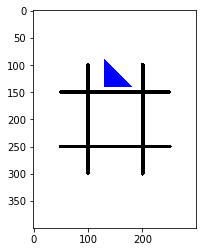

Escolha a posição desejada para x:1
Escolha a posição desejada para y:1


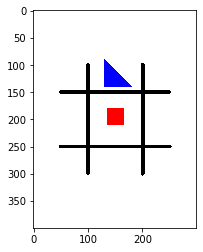

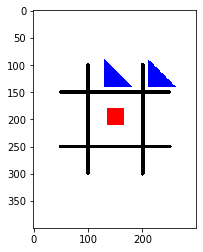

Escolha a posição desejada para x:0
Escolha a posição desejada para y:0


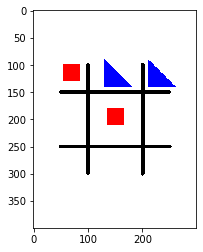

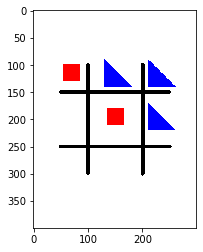

Escolha a posição desejada para x:0
Escolha a posição desejada para y:1


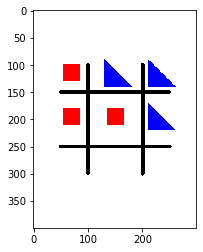

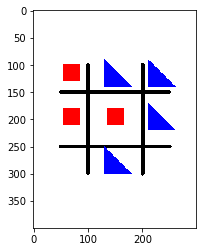

Escolha a posição desejada para x:2
Escolha a posição desejada para y:2


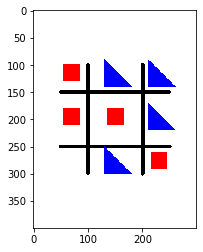

VOCÊ GANHOU!
Deseja jogar de novo? Digite s para jogar novamente.s


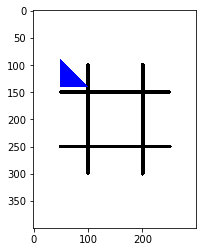

Escolha a posição desejada para x:1
Escolha a posição desejada para y:1


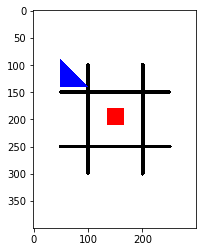

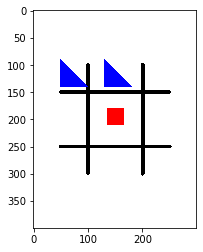

Escolha a posição desejada para x:0
Escolha a posição desejada para y:2


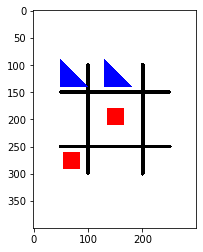

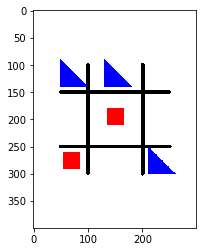

Escolha a posição desejada para x:0
Escolha a posição desejada para y:1


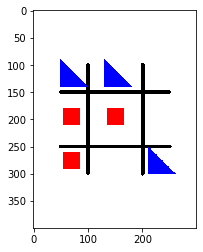

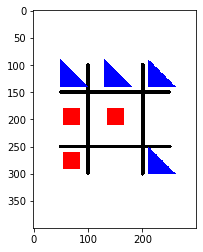

VOCÊ PERDEU!
Deseja jogar de novo? Digite s para jogar novamente.n


In [10]:
play()
newRound = input("Deseja jogar de novo? Digite s para jogar novamente.")

while newRound == 's':
    play()
    newRound = input("Deseja jogar de novo? Digite s para jogar novamente.")